# Production facility 03 -  Lot sizing
*This notebook illustrates how to size a lot. 
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import os 

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe


### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from analogistics.data.data_generator_distribution import generateDistributionData

#random generation of distribution data
_, _, _, D_mov = generateDistributionData(num_movements=2500, num_parts = 100)


In [4]:
#print nodes dataframe
display(HTML(D_mov.head().to_html()))

,LOADING_NODE,LOADING_NODE_DESCRIPTION,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_NODE_DESCRIPTION,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION,USER
0,3,NODE_3,41.494562,14.615247,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:59:22.344762,2020-01-02 01:13:12.412183,13,NODE_13,41.842807,14.459304,2020-01-02 11:25:12.694869,2020-01-02 12:25:12.694869,2020-01-02 11:24:54.951186,2020-01-02 12:36:44.724579,96,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,6.603404,2019-12-31 04:15:01.797308,TEU CONTAINER,USER_4
0,4,NODE_4,41.820779,14.888765,2020-01-02 14:14:15.272368,2020-01-02 15:14:15.272368,2020-01-02 14:15:30.544884,2020-01-02 15:23:02.368662,21,NODE_21,41.609503,14.255577,2020-01-03 06:06:16.317314,2020-01-03 07:06:16.317314,2020-01-03 05:54:18.430974,2020-01-03 06:53:26.240099,69,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,8.692962,2020-01-01 11:01:23.845500,TEU CONTAINER,USER_0
0,9,NODE_9,41.531586,14.315871,2020-01-03 11:23:53.452203,2020-01-03 12:23:53.452203,2020-01-03 11:46:51.007913,2020-01-03 12:44:26.598932,0,NODE_0,41.637227,14.592164,2020-01-03 22:45:24.199769,2020-01-03 23:45:24.199769,2020-01-03 22:50:18.004986,2020-01-03 23:41:47.773999,34,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,3.892774,2019-12-21 00:20:56.709441,FEU CONTAINER,USER_2
0,13,NODE_13,41.842807,14.459304,2020-01-03 23:48:18.964846,2020-01-04 00:48:18.964846,2020-01-04 00:06:44.134215,2020-01-04 00:50:20.919160,8,NODE_8,41.422408,15.025318,2020-01-05 02:27:24.035606,2020-01-05 03:27:24.035606,2020-01-05 02:16:51.141888,2020-01-05 03:41:36.744430,38,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,2.208654,2020-01-03 02:45:21.655364,FEU CONTAINER,USER_6
0,12,NODE_12,41.784882,14.669420,2020-01-05 05:52:42.213661,2020-01-05 06:52:42.213661,2020-01-05 05:36:59.724804,2020-01-05 07:05:22.551068,13,NODE_13,41.842807,14.459304,2020-01-05 12:11:18.467807,2020-01-05 13:11:18.467807,2020-01-05 11:44:02.356204,2020-01-05 12:58:53.736530,5,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,2.514064,2019-12-07 22:09:02.714166,FEU CONTAINER,USER_3


### Create folder hierarchy

In [5]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
root_path = os.path.join(pathResults,f"{string_casestudy}_results")
prediction_results_path = os.path.join(root_path,f"P7_lotSizing")

os.makedirs(root_path, exist_ok=True)
os.makedirs(prediction_results_path, exist_ok=True)

### Select a single part

In [6]:
#select the demand of a single item
selected_part = D_mov.iloc[0]['ITEMCODE']
D_mov_part = D_mov[D_mov['ITEMCODE']==selected_part]
D_mov_part

,LOADING_NODE,LOADING_NODE_DESCRIPTION,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_NODE_DESCRIPTION,...,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION,USER
0,3,NODE_3,41.494562,14.615247,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:59:22.344762,2020-01-02 01:13:12.412183,13,NODE_13,...,2020-01-02 12:36:44.724579,96,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,6.603404,2019-12-31 04:15:01.797308,TEU CONTAINER,USER_4
0,7,NODE_7,41.629828,14.914418,2020-04-03 07:40:40.113730,2020-04-03 08:40:40.113730,2020-04-03 07:48:45.423843,2020-04-03 08:21:27.801658,1,NODE_1,...,2020-04-04 14:27:26.767611,96,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,5,1.662924,2020-04-02 22:50:39.357942,TEU CONTAINER,USER_1
0,24,NODE_24,41.778906,14.456486,2020-04-22 05:23:28.928772,2020-04-22 06:23:28.928772,2020-04-22 05:22:05.588520,2020-04-22 06:29:43.164875,14,NODE_14,...,2020-04-22 13:20:38.264197,96,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,6,3.725232,2020-04-15 01:08:21.057582,FEU CONTAINER,USER_5
0,15,NODE_15,41.880107,14.093106,2020-04-28 11:17:29.343625,2020-04-28 12:17:29.343625,2020-04-28 11:35:44.211915,2020-04-28 12:10:51.341854,10,NODE_10,...,2020-04-28 19:06:10.858239,96,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,6,5.670122,2020-04-23 08:56:44.534675,FEU CONTAINER,USER_7
0,6,NODE_6,41.894475,14.489411,2020-09-19 21:10:52.016844,2020-09-19 22:10:52.016844,2020-09-19 21:04:47.853315,2020-09-19 22:08:38.876847,14,NODE_14,...,2020-09-20 09:32:16.378091,96,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,15,9.056650,2020-08-25 18:53:44.660860,TEU CONTAINER,USER_0
0,1,NODE_1,41.921709,14.287625,2020-10-11 07:50:08.290202,2020-10-11 08:50:08.290202,2020-10-11 07:39:03.863743,2020-10-11 08:52:07.470437,22,NODE_22,...,2020-10-11 11:30:05.054680,96,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,16,6.533021,2020-10-04 21:51:51.843201,FEU CONTAINER,USER_3
0,5,NODE_5,41.592938,14.302215,2020-11-02 18:00:37.291584,2020-11-02 19:00:37.291584,2020-11-02 17:56:44.989445,2020-11-02 18:55:36.841647,22,NODE_22,...,2020-11-03 07:07:31.526384,96,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,18,8.014873,2020-11-01 08:19:16.211102,FEU CONTAINER,USER_0
0,4,NODE_4,41.820779,14.888765,2022-05-04 16:03:15.813159,2022-05-04 17:03:15.813159,2022-05-04 16:08:54.147887,2022-05-04 17:13:53.900050,1,NODE_1,...,2022-05-06 04:22:21.921901,96,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,50,5.133427,2022-04-29 07:40:30.730223,TEU CONTAINER,USER_0
0,17,NODE_17,41.532557,14.214061,2022-05-25 20:24:57.397040,2022-05-25 21:24:57.397040,2022-05-25 20:43:20.168281,2022-05-25 22:07:22.211465,20,NODE_20,...,2022-05-26 09:56:49.470615,96,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,52,1.927749,2022-05-21 06:26:02.500905,TEU CONTAINER,USER_6
0,5,NODE_5,41.592938,14.302215,2022-06-22 00:06:48.030426,2022-06-22 01:06:48.030426,2022-06-21 23:48:06.368715,2022-06-22 01:19:07.869594,22,NODE_22,...,2022-06-22 09:21:23.152621,96,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,53,2.330436,2022-06-21 09:43:08.209929,FEU CONTAINER,USER_4


### Preprocess data

In [7]:
#calculate the weekly demand
from analogistics.statistics.time_series import sampleTimeSeries
D_mov_part['PERIOD'] = sampleTimeSeries(D_mov_part['TIMESTAMP_IN'],sampleInterval='week')
D_mov_part = D_mov_part.groupby(['PERIOD']).sum()['QUANTITY'].reset_index()

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text major ticklabel objects>)

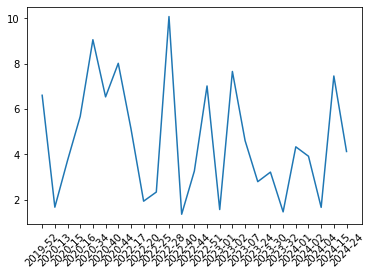

In [8]:
#plot the demand
import matplotlib.pyplot as plt
plt.plot(D_mov_part['PERIOD'], D_mov_part['QUANTITY'])
plt.xticks(rotation=45)

In [9]:
#calculate the parameters
d_mean = np.mean(D_mov_part['QUANTITY'])

print(f"Mean demand per week: {d_mean}")

Mean demand per week: 4.604104647867151


### Pull paradigm - kanban system

In [10]:
#assume the storage level is checked once a week
SS_check = 1/7 

#assume a week is necessary to retrieve the quantity from the supploer
SS_supply = 1

SS = SS_check+SS_supply
WIP = d_mean*(1 + SS)

print(f"WIP level using kanban: {WIP}")

WIP level using kanban: 9.865938531143893


### Lot sizing - economic order quantity (BUY)

In [11]:
#assume the value of the storage cost
h_storage_cost = 7.5 #euro/year

#assume the cost of sending an order
C_prime_order_cost = 0.2 #euro/order

#calculate the total demand per year
Y = d_mean*12

#calculate the optimal lot side
Q_buy=np.sqrt((2*C_prime_order_cost*Y)/h_storage_cost)

print(f"Optimal economic order quantity (EOQ): {Q_buy}")

Optimal economic order quantity (EOQ): 1.7165741972414057


### Lot sizing - economic order quantity (MAKE)

In [12]:
#assume the value of the storage cost
h_storage_cost = 7.3 #euro/year

#assume the cost of setup the machine to process the part
C_prime_setup_cost = 120 #euro/setup

#calculate the total demand per year
Y = d_mean*12

#assume the productivity
X = Y*1.03

#calculate the optimal lot side
Q_make=np.sqrt((2*C_prime_setup_cost*Y)/h_storage_cost)*np.sqrt(X/(X-Y))

print(f"Optimal economic order quantity (EOQ): {Q_make}")

Optimal economic order quantity (EOQ): 249.7269378826819


### Spare parts management - Poisson method

In [13]:
from scipy.stats import poisson
# use the poisson distribution to estimate the probability
mu = d_mean


#assume the value of the storage cost
h_storage_cost = 70 #euro/year

#assume the cost of stockout
C_stockout_cost = 99 #euro/stockout


In [14]:
#define a dataframe with the results
D_prod = pd.DataFrame(columns=['Q','CDF','PDF'])

#define the probability
Q_min = 0
Q_max = int(3*d_mean)
for Q in range(Q_min,Q_max+1):
    storage_qty_prob = poisson.cdf(Q, mu)
    storage_qty_prob_point = poisson.cdf(Q, mu) -  poisson.cdf(Q-1, mu)
    D_prod = D_prod.append(pd.DataFrame([[Q, storage_qty_prob, storage_qty_prob_point]],columns=D_prod.columns))


# define the storage cost
D_prod=D_prod.reset_index(drop=True)
D_prod['STORAGE_COST']=np.nan
for index,row in D_prod.iterrows():
    storage_cost = 0
    for q in range(0,index+1):
        #print(D_prod.iloc[q]['PDF'])
        storage_cost = storage_cost + D_prod.iloc[q]['Q'] * D_prod.iloc[q]['PDF']
        #print(storage_cost)
    D_prod.at[index,'STORAGE_COST'] = storage_cost*h_storage_cost
    
# define the stockout cost
D_prod['STOCKOUT_COST']=np.nan
for index,row in D_prod.iterrows():
    stockout_prob = 0
    for q in range(index,max(D_prod.index)):
        #print(D_prod.iloc[q]['PDF'])
        stockout_prob = stockout_prob + D_prod.iloc[q]['PDF']
        stockout_cost = (stockout_prob)*C_stockout_cost*d_mean
        #print(storage_cost)
    D_prod.at[index,'STOCKOUT_COST'] = stockout_cost

#calculate the total cost
D_prod['TOTAL_COST'] = D_prod['STOCKOUT_COST'] + D_prod['STORAGE_COST']

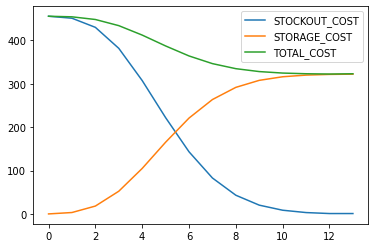

In [15]:
plt.plot(D_prod['Q'], D_prod['STOCKOUT_COST'])
plt.plot(D_prod['Q'], D_prod['STORAGE_COST'])
plt.plot(D_prod['Q'], D_prod['TOTAL_COST'])
plt.legend(["STOCKOUT_COST", "STORAGE_COST","TOTAL_COST"])


In [16]:
#Display the results dataframe
display(HTML(D_prod.head().to_html()))

,Q,CDF,PDF,STORAGE_COST,STOCKOUT_COST,TOTAL_COST
0,0,0.010011,0.010011,0.000000,455.356602,455.356602
1,1,0.056101,0.046090,3.226309,450.793679,454.019988
2,2,0.162203,0.106102,18.080574,429.785504,447.866078
3,3,0.325037,0.162835,52.275870,381.423586,433.699456
4,4,0.512464,0.187427,104.755443,307.202476,411.957918
